In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from enum import Enum
import math
from decimal import Decimal
# from collections import OrderedDict"

# 窓等の大部分がガラスで構成される開口部（一重建具）の簡易的評価

## 1. 背景

窓等の大部分がガラスで構成される開口部の簡易的評価（一重建具）は、建築研究所公開資料の第3章「暖冷房負荷」第3節「熱貫流率及び線熱貫流率」の付録B「窓又はドアの熱貫流率」のB.3「窓等の大部分がガラスで構成される開口部」表1「窓等の大部分がガラスで構成される開口部（一重構造の建具）の熱貫流率」において、建具の仕様・ガラスの仕様・ガスの封入の有無・中空層の厚さに応じて値が決められている。  
しかし、ここで示す、建具の仕様等は、現在発売されている全ての窓をカバーしているとはいえない。  
表1に示す仕様にあてはまらない開口部については、JIS A2012-1「窓及びドアの熱性能－熱貫流率の計算」等の規格に則って計算・試験をすることになるが、その場合、個々の窓の寸法に応じて窓性能を計算する必要があることや、枠の線熱貫流率の計算（通常は定常二次元計算が適用される。）に多くの評価コストがかかることから、従来の表1に代わり、かつ窓仕様の適用範囲が広い新たな評価方法の構築が望まれていた。  

## 2. 検討方針

窓の熱貫流率の計算方法は、JIS A2012-1に規定されている。  
この方法は上述したとおり、当該窓個々に異なる面積・寸法、フレーム及びスペーサー等の熱物性に応じて計算することになっている。  
個々の窓に応じた計算ではなく、簡易的に枠の種類やガラス中央部の熱貫流率($U_g$値)に応じて計算できる方法とするために、計算方法はJIS A2012-1に準拠しつつ、加えて以下の仮定をおくことによって、簡易的な評価方法を構築する。

- 建具の種類に応じて、代表的な面積・寸法を規定する。この面積・寸法は、当該窓の面積・寸法に関わらず、全ての窓に適用することができることとする。
- 建具（フレーム）の線熱貫流率は、枠の種類に応じて定まることとする。当該窓の建具（フレーム）の線熱貫流率に関わらずこの値を適用できることとする。
- グレージング、スペーサ及びフレームの熱影響の組み合わせによる線熱貫流率は、JISで規定があるが、JISによる規定に加えて、建具の種類に応じたデフォルト値を設定する。

## 3. JISにおける評価

今回提案する方法は、従来のようなUg値とUw値との近似式ではなく、以下のJIS A2102-1「窓及びドアの熱性能－熱貫流率の計算」に基づく計算式をもとに、フレームやグレージングの面積、グレージング周囲長さ等にデフォルト値を与えたものである。

$\begin{align} U_w = \frac { \Sigma { A_g U_g } + \Sigma { A_f U_f } + \Sigma { l_g \psi_g } } { \Sigma { A_g } + \Sigma { A_f } } \end{align}$

ここで、

$A$:面積(m<sup>2</sup>)  
$l$:長さ(m)  
$U$:熱貫流率(W/m<sup>2</sup>K)  
$\psi$:線熱貫流率(W/mK)  
g:グレージング  
f:フレーム

である。

In [2]:
def get_Uw(Ag, Ug, Af, Uf, lg, psig):
    return ( ( Ag * Ug ).sum() + ( Af * Uf ).sum() + ( lg * psig ).sum() ) / ( Ag.sum() + Af.sum() )

## 4. 技術資料で定めるデフォルト値

枠の種類として以下の3種類に分類している。
- 木製建具又は樹脂製建具
- 木と金属の複合材料製建具 又は 樹脂と金属の複合材料製建具
- 金属製建具

In [3]:
class FlameType(Enum):
    WoodResin = "WoodResin" # 木製建具又は樹脂製建具
    Complex   = "Complex"   # 木と金属の複合材料製建具 又は 樹脂と金属の複合材料製建具
    Metal     = "Metal"     # 金属製建具

技術資料で定めるデフォルト値は以下のとおりである。

### ガラス（グレージング）面積 (m<sup>2</sup>)

| 木製建具<br>又は<br>樹脂製建具 | 木と金属の複合材料製建具<br>又は<br>樹脂と金属の複合材料製建具 | 金属製建具 |
| --- | --- | --- |
| 1.531 | 1.853 | 1.883 |

In [4]:
GlassArea = { FlameType.WoodResin : 1.531, FlameType.Complex : 1.853, FlameType.Metal : 1.883 }

### 建具（フレーム）面積 (m<sup>2</sup>）

|   | 木製建具<br>又は<br>樹脂製建具 | 木と金属の複合材料製建具<br>又は<br>樹脂と金属の複合材料製建具 | 金属製建具 |
| --- | --- | --- | --- |
| 内側サッシ（上） | 0.119 | 0.064 | 0.071 |
| 内側サッシ（下） | 0.121 | 0.069 | 0.081 |
| 内側サッシ（縦） | 0.117 | 0.079 | 0.052 |
| 召合せ           | 0.080 | 0.040 | 0.030 | 
| 外側サッシ（上） | 0.119 | 0.064 | 0.071 |
| 外側サッシ（下） | 0.121 | 0.069 | 0.081 |
| 外側サッシ（縦） | 0.117 | 0.079 | 0.052 |

In [5]:
FrameArea = namedtuple('FrameArea', ('inside_top', 'inside_bottom', 'inside_vert', 'meeting', 'outside_top', 'outside_bottom', 'outside_vert'))
FrameAreaTable = { FlameType.WoodResin : FrameArea(0.119, 0.121, 0.117, 0.080, 0.119, 0.121, 0.117),
                   FlameType.Complex   : FrameArea(0.064, 0.069, 0.079, 0.040, 0.064, 0.069, 0.079),
                   FlameType.Metal     : FrameArea(0.071, 0.081, 0.052, 0.030, 0.071, 0.081, 0.052) }

ガラス(グレージング)周長 (m)

|   | 木製建具<br>又は<br>樹脂製建具 | 木と金属の複合材料製建具<br>又は<br>樹脂と金属の複合材料製建具 | 金属製建具 |
| --- | --- | --- | --- |
| 内側サッシ（上）     | 0.690 | 0.770 | 0.780 |
| 内側サッシ（下）     | 0.690 | 0.770 | 0.780 |
| 内側サッシ（縦）     | 1.130 | 1.210 | 1.220 |
| 内側サッシ（召合せ） | 1.130 | 1.210 | 1.220 | 
| 外側サッシ（上）     | 0.690 | 0.770 | 0.780 |
| 外側サッシ（下）     | 0.690 | 0.770 | 0.780 |
| 外側サッシ（縦）     | 1.130 | 1.210 | 1.220 |
| 内側サッシ（召合せ） | 1.130 | 1.210 | 1.220 | 

In [6]:
GlassPerimeterLength = namedtuple('GlassPerimeterLength', ('inside_top', 'inside_bottom', 'inside_vert', 'inside_meeting', 'outside_top', 'outside_bottom', 'outside_vert', 'outside_meeting'))
GlassPerimeterLengthTable = { FlameType.WoodResin : GlassPerimeterLength(0.690, 0.690, 1.130, 1.130, 0.690, 0.690, 1.130, 1.130),
                              FlameType.Complex   : GlassPerimeterLength(0.770, 0.770, 1.210, 1.210, 0.770, 0.770, 1.210, 1.210),
                              FlameType.Metal     : GlassPerimeterLength(0.780, 0.780, 1.220, 1.220, 0.780, 0.780, 1.220, 1.220) }

適用可能な窓の熱貫流率・線熱貫流率

|   | 木製建具<br>又は<br>樹脂製建具 | 木と金属の複合材料製建具<br>又は<br>樹脂と金属の複合材料製建具 | 金属製建具 |
| --- | --- | --- | --- |
| 建具(フレーム)の熱貫流率 (W/m<sup>2</sup>K) | 2.379 | 4.367 | 7.349 |
| グレージング、スペーサ及びフレームの熱影響の<br>組み合わせによる線熱貫流率注(W/mK) | 0.070 | 0.080 | 0.035 |

注：単層グレージングの場合、ゼロ(スペーサー等の影響が無い)とする。


In [7]:
frame_U    = { FlameType.WoodResin : 2.379, FlameType.Complex : 4.367, FlameType.Metal : 7.349 }
frame_psig = { FlameType.WoodResin : 0.070, FlameType.Complex : 0.080, FlameType.Metal : 0.035 }

## 5. デフォルト値を計算した場合の熱貫流率の計算

In [8]:
def get_Uw_Simple(t, Ug, isSimpleGlass):
    _Ag = np.array([GlassArea[t]])
    _Ug = Ug
    _Af = np.array(FrameAreaTable[t])
    _Uf = frame_U[t]
    _lg = np.array(GlassPerimeterLengthTable[t])
    if(isSimpleGlass):
        _psig = 0.0
    else:
        _psig = frame_psig[t]
    return get_Uw( _Ag, _Ug, _Af, _Uf, _lg, _psig )

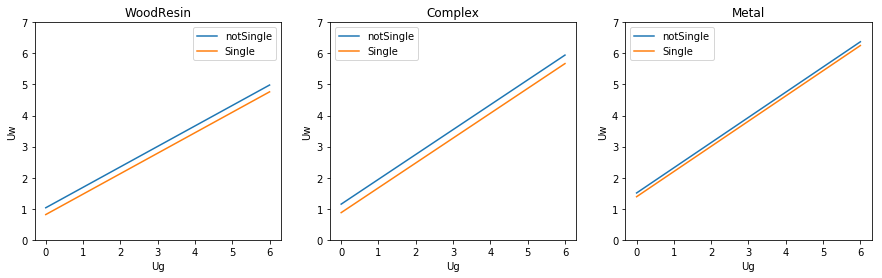

In [9]:
x = np.linspace(0,6,100)

y1 = np.vectorize(get_Uw_Simple)( FlameType.WoodResin, x, False )
y2 = np.vectorize(get_Uw_Simple)( FlameType.WoodResin, x, True  )
y3 = np.vectorize(get_Uw_Simple)( FlameType.Complex,   x, False )
y4 = np.vectorize(get_Uw_Simple)( FlameType.Complex,   x, True  )
y5 = np.vectorize(get_Uw_Simple)( FlameType.Metal,     x, False )
y6 = np.vectorize(get_Uw_Simple)( FlameType.Metal,     x, True  )

plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
plt.plot(x, y1, label='notSingle')
plt.plot(x, y2, label='Single')
plt.title('WoodResin')
plt.xlabel('Ug')
plt.ylabel('Uw')
plt.ylim(0.0,7.0)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x, y3, label='notSingle')
plt.plot(x, y4, label='Single')
plt.title('Complex')
plt.xlabel('Ug')
plt.ylabel('Uw')
plt.ylim(0.0,7.0)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x, y5, label='notSingle')
plt.plot(x, y6, label='Single')
plt.title('Metal')
plt.xlabel('Ug')
plt.ylabel('Uw')
plt.ylim(0.0,7.0)
plt.legend()

plt.show()

## 6. 開発した式を表現上簡単にした形

開発した評価方法は、将来のUf値の向上、フレームと窓の面積比率の変化などに対応できるように、極力、JISので定義されている評価方法を活用することとしており、面積・寸法やUf値などのデフォルト値を設定するのみにとどめている。  
一方で、この評価方法をより理解しやすくするために、設定したデフォルト値をJISの評価式に代入し、式変形することで、下式のように簡単に表すことができる。

$U_w = a \times U_g + b$

ここで、係数$a$及び$b$は以下のように表される。

$\begin{align} a = \frac { A_g } { A_g + \Sigma { A_f } } \end{align}$

$\begin{align} b = \frac { \Sigma { A_f U_f } + \Sigma { l_g \psi_g } } { A_g + \Sigma { A_f } } \end{align}$

係数$a$は、小数第3位未満の端数を切り上げた少数第3位の値とする。  
係数$b$は、小数第2位未満の端数を切り上げた少数第2位の値とする。  
なお、係数aと係数bとで端数処理の桁数が異なるのは、先行して評価方法を公開していたドアの評価において同様の式があり、その式の端数処理と合わせたからである。(2017/12)

In [10]:
def get_coeff(t, isSimpleGlass):
    _Ag = GlassArea[t]
    _Af = np.array(FrameAreaTable[t])
    _Uf = frame_U[t]
    _lg = np.array(GlassPerimeterLengthTable[t])
    if(isSimpleGlass):
        _psig = 0.0
    else:
        _psig = frame_psig[t]
    _rowValue_a = _Ag / ( _Ag + _Af.sum() )
    _rowValue_b = ( ( _Af * _Uf ).sum() + ( _lg * _psig ).sum() )/( _Ag + _Af.sum() )
    return ( math.ceil( _rowValue_a * 1000 ) / 1000, math.ceil( _rowValue_b * 100 ) / 100 )

### 木製建具又は樹脂製建具の係数

In [11]:
get_coeff(FlameType.WoodResin, True)

(0.659, 0.82)

In [12]:
get_coeff(FlameType.WoodResin, False)

(0.659, 1.04)

### 木と金属の複合材料製建具又は樹脂と金属の複合材料製建具

In [13]:
get_coeff(FlameType.Complex, True)

(0.8, 0.88)

In [14]:
get_coeff(FlameType.Complex, False)

(0.8, 1.15)

### 金属製建具

In [15]:
get_coeff(FlameType.Metal, True)

(0.812, 1.39)

In [16]:
get_coeff(FlameType.Metal, False)

(0.812, 1.51)

## 7. 開発した式で計算した値と丸めた係数a,bを用いて計算した値との比較

上記で算出した係数$a$と係数$b$は以下のとおりである。

| 建具の種類 | 単板ガラスか否か | 係数a | 係数b |
| --- | --- | --- | --- |
| 木製建具又は樹脂製建具 | 単板 | 0.659 | 0.82 |
| 木製建具又は樹脂製建具 | 単板以外 | 0.659 | 1.04 |
| 木と金属の複合材料製建具又は樹脂と金属の複合材料製建具 | 単板 | 0.800 | 0.88 |
| 木と金属の複合材料製建具又は樹脂と金属の複合材料製建具 | 単板以外 | 0.800 | 1.15 |
| 金属製建具 | 単板 | 0.812 | 1.39 |
| 金属製建具 | 単板以外 | 0.812 | 1.51 |

In [17]:
Coeff_a = { FlameType.WoodResin : 0.659, FlameType.Complex : 0.800, FlameType.Metal : 0.812 }

In [18]:
Coeff_b_single = { FlameType.WoodResin : 0.82, FlameType.Complex : 0.88, FlameType.Metal : 1.39 }

In [19]:
Coeff_b_notsingle = { FlameType.WoodResin : 1.04, FlameType.Complex : 1.15, FlameType.Metal : 1.51 }

係数aとbを用いてUw値を算出する。

In [20]:
def get_Uw_Simple_Using_Coeff(t, Ug, isSimpleGlass):
    if(isSimpleGlass):
        return Coeff_a[t] * Ug + Coeff_b_single[t]
    else:
        return Coeff_a[t] * Ug + Coeff_b_notsingle[t]

### 開発した式で計算した値と丸めた係数a,bを用いて計算した値との比較（絶対値）

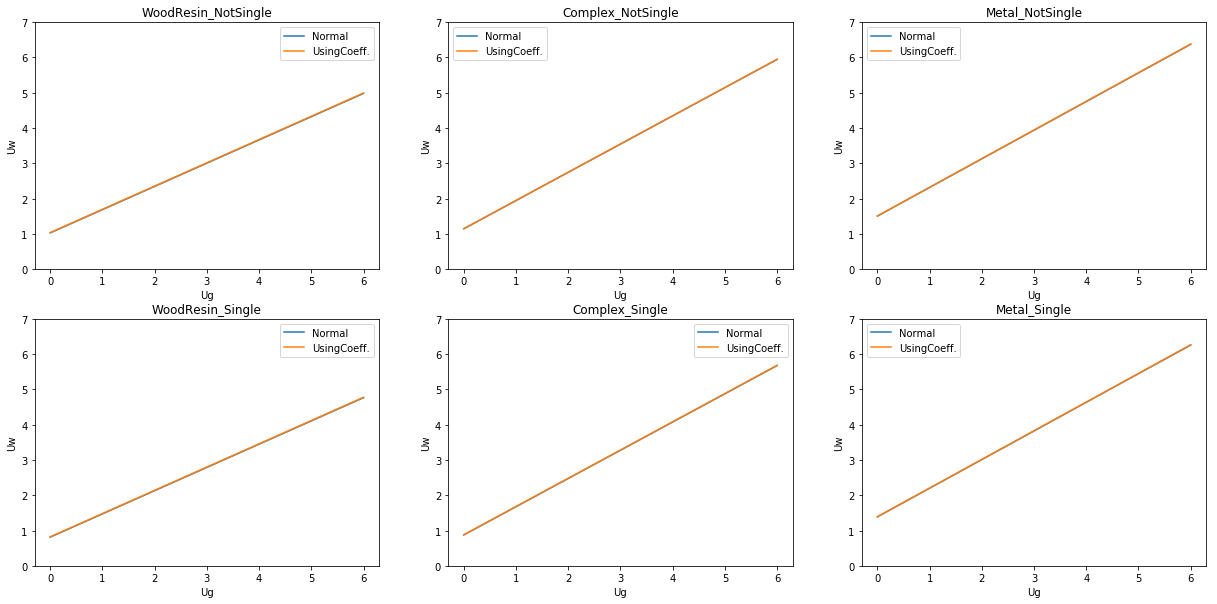

In [21]:
x = np.linspace(0,6,100)

y1_1 = np.vectorize(get_Uw_Simple)( FlameType.WoodResin, x, False )
y1_2 = np.vectorize(get_Uw_Simple_Using_Coeff)( FlameType.WoodResin, x, False)
y2_1 = np.vectorize(get_Uw_Simple)( FlameType.Complex, x, False )
y2_2 = np.vectorize(get_Uw_Simple_Using_Coeff)( FlameType.Complex, x, False)
y3_1 = np.vectorize(get_Uw_Simple)( FlameType.Metal, x, False )
y3_2 = np.vectorize(get_Uw_Simple_Using_Coeff)( FlameType.Metal, x, False)
y4_1 = np.vectorize(get_Uw_Simple)( FlameType.WoodResin, x, True )
y4_2 = np.vectorize(get_Uw_Simple_Using_Coeff)( FlameType.WoodResin, x, True)
y5_1 = np.vectorize(get_Uw_Simple)( FlameType.Complex, x, True )
y5_2 = np.vectorize(get_Uw_Simple_Using_Coeff)( FlameType.Complex, x, True)
y6_1 = np.vectorize(get_Uw_Simple)( FlameType.Metal, x, True )
y6_2 = np.vectorize(get_Uw_Simple_Using_Coeff)( FlameType.Metal, x, True)

plt.figure(figsize=(21,10))

plt.subplot(2, 3, 1)
plt.plot(x, y1_1, label='Normal')
plt.plot(x, y1_2, label='UsingCoeff.')
plt.title('WoodResin_NotSingle')
plt.xlabel('Ug')
plt.ylabel('Uw')
plt.ylim(0.0,7.0)
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(x, y2_1, label='Normal')
plt.plot(x, y2_2, label='UsingCoeff.')
plt.title('Complex_NotSingle')
plt.xlabel('Ug')
plt.ylabel('Uw')
plt.ylim(0.0,7.0)
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(x, y3_1, label='Normal')
plt.plot(x, y3_2, label='UsingCoeff.')
plt.title('Metal_NotSingle')
plt.xlabel('Ug')
plt.ylabel('Uw')
plt.ylim(0.0,7.0)
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(x, y4_1, label='Normal')
plt.plot(x, y4_2, label='UsingCoeff.')
plt.title('WoodResin_Single')
plt.xlabel('Ug')
plt.ylabel('Uw')
plt.ylim(0.0,7.0)
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(x, y5_1, label='Normal')
plt.plot(x, y5_2, label='UsingCoeff.')
plt.title('Complex_Single')
plt.xlabel('Ug')
plt.ylabel('Uw')
plt.ylim(0.0,7.0)
plt.legend()

plt.subplot(2, 3, 6)
plt.plot(x, y6_1, label='Normal')
plt.plot(x, y6_2, label='UsingCoeff.')
plt.title('Metal_Single')
plt.xlabel('Ug')
plt.ylabel('Uw')
plt.ylim(0.0,7.0)
plt.legend()

plt.show()

### 開発した式で計算した値と丸めた係数a,bを用いて計算した値との比較（比較）

開発した式で計算した値に対する誤差を示す。  
グラフを見る限り、両者の値は0.1%未満であることがわかる。  
また、係数を切り上げしているため当然ではあるが、丸めた係数a,bを用いて計算した値の方が大きいUg値となっている。

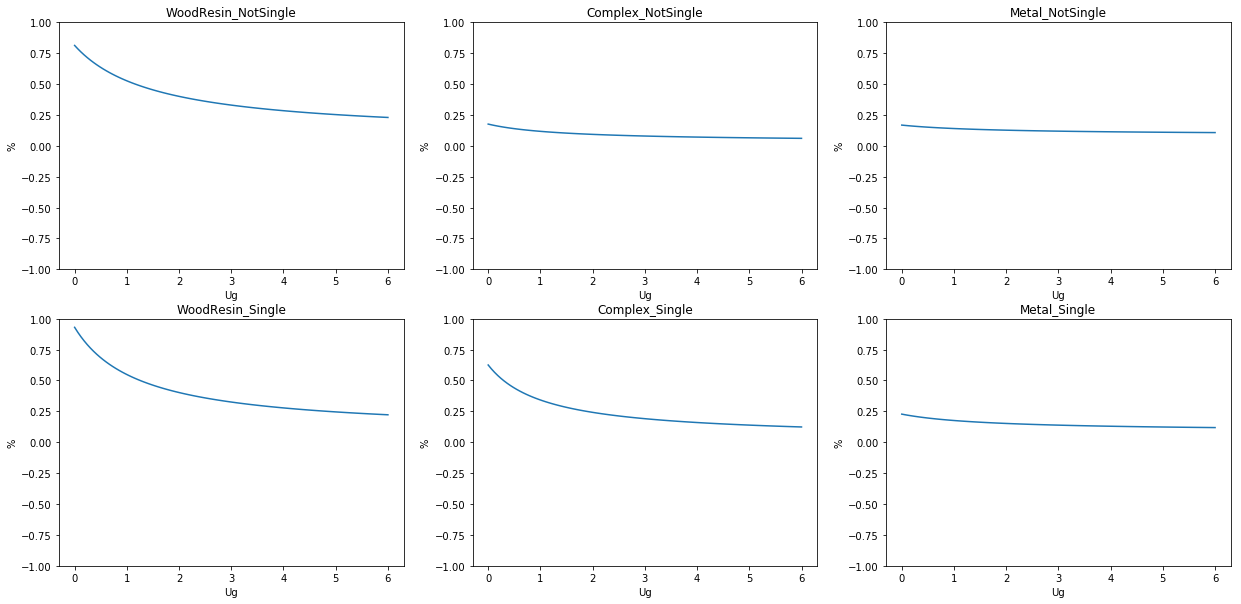

In [22]:
x = np.linspace(0,6,100)

y1_1 = np.vectorize(get_Uw_Simple)( FlameType.WoodResin, x, False )
y1_2 = np.vectorize(get_Uw_Simple_Using_Coeff)( FlameType.WoodResin, x, False)
y2_1 = np.vectorize(get_Uw_Simple)( FlameType.Complex, x, False )
y2_2 = np.vectorize(get_Uw_Simple_Using_Coeff)( FlameType.Complex, x, False)
y3_1 = np.vectorize(get_Uw_Simple)( FlameType.Metal, x, False )
y3_2 = np.vectorize(get_Uw_Simple_Using_Coeff)( FlameType.Metal, x, False)
y4_1 = np.vectorize(get_Uw_Simple)( FlameType.WoodResin, x, True )
y4_2 = np.vectorize(get_Uw_Simple_Using_Coeff)( FlameType.WoodResin, x, True)
y5_1 = np.vectorize(get_Uw_Simple)( FlameType.Complex, x, True )
y5_2 = np.vectorize(get_Uw_Simple_Using_Coeff)( FlameType.Complex, x, True)
y6_1 = np.vectorize(get_Uw_Simple)( FlameType.Metal, x, True )
y6_2 = np.vectorize(get_Uw_Simple_Using_Coeff)( FlameType.Metal, x, True)

plt.figure(figsize=(21,10))

plt.subplot(2, 3, 1)
plt.plot(x, ((y1_2-y1_1)/y1_1)*100 )
plt.title('WoodResin_NotSingle')
plt.xlabel('Ug')
plt.ylabel('%')
plt.ylim(-1.0,1.0)

plt.subplot(2, 3, 2)
plt.plot(x, ((y2_2-y2_1)/y2_1)*100 )
plt.title('Complex_NotSingle')
plt.xlabel('Ug')
plt.ylabel('%')
plt.ylim(-1.0,1.0)

plt.subplot(2, 3, 3)
plt.plot(x, ((y3_2-y3_1)/y3_1)*100 )
plt.title('Metal_NotSingle')
plt.xlabel('Ug')
plt.ylabel('%')
plt.ylim(-1.0,1.0)

plt.subplot(2, 3, 4)
plt.plot(x, ((y4_2-y4_1)/y4_1)*100 )
plt.title('WoodResin_Single')
plt.xlabel('Ug')
plt.ylabel('%')
plt.ylim(-1.0,1.0)

plt.subplot(2, 3, 5)
plt.plot(x, ((y5_2-y5_1)/y5_1)*100 )
plt.title('Complex_Single')
plt.xlabel('Ug')
plt.ylabel('%')
plt.ylim(-1.0,1.0)

plt.subplot(2, 3, 6)
plt.plot(x, ((y6_2-y6_1)/y6_1)*100 )
plt.title('Metal_Single')
plt.xlabel('Ug')
plt.ylabel('%')
plt.ylim(-1.0,1.0)

plt.show()